In [1]:
import os
import json
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from arch import arch_model

In [2]:
ini_work_dir = os.getcwd()
os.chdir('..')

In [3]:
from local_models import calculate_retraining_garch_forecasts

In [4]:
with open('config.json') as file:
    config = json.load(file)

In [5]:
files_folder = config['files_folders']['processed']
RES_DIR = Path(config['files_folders']['research_results'])
antecedent_params_folder = config['files_folders']['antecedent_params_sets']
metadata_file_name = 'current_antecedent_fitting_metadata_seasonal.pkl'
logs_folder = config['files_folders']['logs']
summary_table_name = 'summary_table_seas'
FIGS_DIR = RES_DIR / 'figs'

In [6]:
pd.options.display.max_colwidth = 300
pd.options.display.precision = 15

# Reading results files

## Seasonal

In [25]:
_files = ['apf_seas_nb_0_imoex_2015-01-05_1260_252_504_M=[1,_20]_at_2022-10-19_11-22-07.290056.pkl']
res_big = [pd.read_pickle(f'{RES_DIR}/{_file}') for _file in _files]
_res = [_elem for res_piece in res_big for _elem in res_piece['result']].copy()

res = pd.DataFrame.from_records(_res).copy()

In [26]:
if (res['status'] != 0).any():
    raise Error('Not all models were fitted')

In [27]:
res.shape

(2592, 8)

In [28]:
res.sort_values('rmse', ascending=False)

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
367,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, -0.035, 0.035, 0.06), 'variances': (0.06, 0.06, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac144d30a60>,0.000000070902831,0.000266275854917,1.036717202314047,None,None
162,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, 0.015, 0.06), 'variances': (0.04, 0.04, 0.06, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1432f3070>,0.000000070900536,0.000266271544885,1.036617292836056,None,None
484,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.015, 0.035, 0.04), 'variances': (0.04, 0.06, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac14590d400>,0.000000070861566,0.000266198359166,1.035007031355274,None,None
216,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, 0.035, 0.06), 'variances': (0.06, 0.04, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac143970490>,0.000000070844853,0.000266166965418,1.034310178189787,None,None
1052,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, 0.005000000000000001, 0.015, 0.02), 'variances': (0.06, 0.06, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1479cb1c0>,0.000000070833127,0.000266144936083,1.033821854182782,None,None
...,...,...,...,...,...,...,...,...
619,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, 0.005000000000000001, 0.015, 0.02), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac14626b460>,0.000000070431407,0.000265389160675,1.021863854330176,None,None
27,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, -0.015, 0.015, 0.06), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac13f22b550>,0.000000070431407,0.000265389160649,1.021863919986858,None,None
443,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.015, 0.015, 0.04), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1457bd9d0>,0.000000070431407,0.000265389160563,1.021864138764117,None,None
1101,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, 0.005000000000000001, 0.035, 0.02), 'variances': (0.06, 0.06, 0.04, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac147c12190>,0.000000070431407,0.000265389160544,1.021864185118641,None,None


In [29]:
res[res['rmse'] == res['rmse'].min()]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
1006,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, -0.005000000000000001, 0.02), 'variances': (0.06, 0.06, 0.06, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1477a5790>,0.000000070431407,0.000265389160481,1.021864348577805,None,None


In [16]:
fitted_ap = res[res['rmse'] == res['rmse'].min()].iloc[0]['antecedent_params'].copy()
fitted_ap

[{'a': [1.0, 1.0],
  'b': [5.0, 1.0],
  'c': [5.0, 1.0],
  'd': [5.0, 5.0],
  'n_clusters': 2},
 {'centers': (-0.05499999999999999, -0.015, 0.015, 0.06),
  'variances': (0.06, 0.04, 0.06, 0.06),
  'n_clusters': 4}]

In [17]:
res['rmse'].value_counts()

0.000872074963722    29
0.000872074963722    27
0.000872074963722    22
0.000872074963722    22
0.000872074963722    21
                     ..
0.000872074973568     1
0.000872074964090     1
0.000872074963907     1
0.000872074970614     1
0.000872074966459     1
Name: rmse, Length: 1755, dtype: int64

In [18]:
eps = 1e-5
res[(res['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback


<AxesSubplot:>

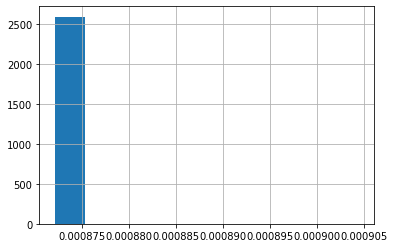

In [19]:
res['rmse'].hist(grid=True)

## W/o seasonality

In [7]:
_files = ['apf_wos_result_imoex_wos_2018-01-03_60_10_10_M=[5]_at_2023-05-08_22-50-05.628227.pkl_2023-05-08_22-50-05.628227.pkl']
res_big_wos = [pd.read_pickle(f'{RES_DIR}/{_file}') for _file in _files]
_res = [_elem for res_piece in res_big_wos for _elem in res_piece['result']].copy()

res_wos = pd.DataFrame.from_records(_res).copy()

In [8]:
if not res_wos['exception'].apply(lambda _elem: _elem is None).all():
    raise Error('At least 1 model ended up with an exception')

if (res_wos['status'] != 0).any():
    raise Error('Not all models were fitted')

In [9]:
best_res = res_wos[res_wos['rmse'] == res_wos['rmse'].min()].iloc[0].copy()
fitted_ap_wos = best_res['antecedent_params'].copy()
fitted_ap_wos

[{'centers': (-0.085, -0.035, 0.01, 0.06),
  'variances': array([0.02, 0.02, 0.02, 0.02]),
  'n_clusters': 4}]

In [10]:
best_res

antecedent_params    [{'centers': (-0.085, -0.035, 0.01, 0.06), 'variances': [0.02, 0.02, 0.02, 0.02], 'n_clusters': 4}]
status                                                                                                                 0
fvm                                                                <model.FuzzyVolatilityModel object at 0x7f8b7afdaee0>
mse                                                                                                    0.000000013041493
rmse                                                                                                   0.000114199357439
mape                                                                                                   0.975752168795656
exception                                                                                                           None
traceback                                                                                                           None
Name: 75, dtype: object

In [11]:
eps = 1e-5
res_wos[(res_wos['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback


<AxesSubplot:>

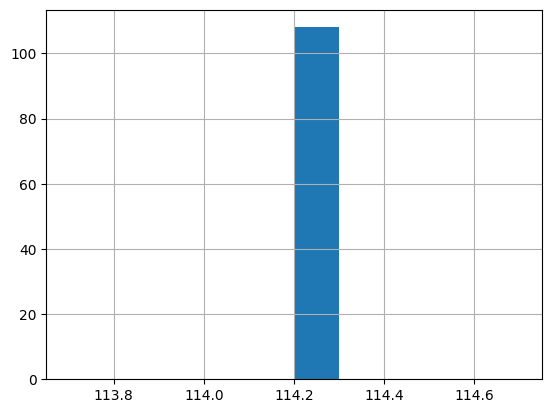

In [12]:
(res_wos['rmse'] * 1e6).round(2).hist(grid=True)

# Tested

## Seasonal

In [34]:
test = res_big[0]['test'].copy()

In [35]:
tested_seas = pd.read_pickle(f'{RES_DIR}/tested_model_seasonal_2022-10-06 00-47-45.375958.pkl')

In [38]:
rmse = mean_squared_error(tested_seas.hist_output, test ** 2, squared=False)
mape = mean_absolute_percentage_error(tested_seas.hist_output, test ** 2)

In [41]:
rmse

0.0022831032042130181728

In [42]:
mape

1.4291477459829316049

## W/o seasonality

In [61]:
test = res_big[0]['test'].copy()

In [ ]:
tested_wos = pd.read_pickle(f'{RES_DIR}/tested_model_wo_seas_2022-10-01 07-33-25.654524.pkl')

In [71]:
rmse = mean_squared_error(tested_wos.hist_output, test ** 2, squared=False)
mape = mean_absolute_percentage_error(tested_wos.hist_output, test ** 2)

In [72]:
rmse

0.0018650939484299551797

In [73]:
mape

1.3087021871618926261

# Vanilla GARCH errors

## No retraining

In [73]:
train = res_big_wos[0]['train'].copy()
# test = res_big[0]['test'].copy()
n_test = test.shape[0]

cons_metaparams = res_big_wos[0]['consequent_metaparams']
p = cons_metaparams['p']
q = cons_metaparams['q']
dist = cons_metaparams['dist']

garch_mean = cons_metaparams['mean']
garch_dist = cons_metaparams['dist']
garch_vol = 'GARCH'

In [74]:
garch = arch_model(train,
                   mean=garch_mean,
                   vol=garch_vol,
                   p=p,
                   q=q,
                   dist=garch_dist)
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131376005.63414252
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1590030.308844311
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1668.445958574404
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2


/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.364e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [76]:
simple_garch_forecasts = garch_fitted.forecast(horizon=n_test, reindex=False).variance.iloc[0].values

In [77]:
mse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=True)
rmse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=False)
mape = mean_absolute_percentage_error(simple_garch_forecasts, test ** 2)

garch_errors = {'mse': mse, 'rmse': rmse, 'mape': mape}
garch_errors

{'mse': 1.4935449306820372e-06,
 'rmse': 0.0012221067591180557,
 'mape': 4.945015207939646}

### W/ retraining

In [78]:
retraining_garch_forecasts = calculate_retraining_garch_forecasts(train, test,
                                                                  mean=garch_mean,
                                                                  vol=garch_vol,
                                                                  p=p,
                                                                  q=q,
                                                                  dist=garch_dist)

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.364e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.364e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131376005.63414252
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1590030.308844311
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1668.445958574404
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1048321768.8154379
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1671.672335435658
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1671.6723356457708
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 110811726.49541016
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1675.5801533794786
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1675.5801536030644
            Iterations: 6
         

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.348e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.332e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 99250287.94068547
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1678.8020624012674
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1678.8020626040875
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 91657210.74901128
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1682.6707899975142
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1682.6707902105318
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 84995129.34261455
Iteration:      2,   Func. Count:     18,   Neg. LLF: 849495.3765250787
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1686.5689038639548
            Iterations: 2
          

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.32e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.328e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 858813112.0738845
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1777.0460934865919
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1777.0460936314214
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 90475337.70946218
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1779.8478800263197
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1779.8478801478125
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 820162993.9654013
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1783.5974581881876
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1783.5974583184393
            Iterations: 6
        

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.253e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.246e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.478461908304176e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2878655683.4067717
Iteration:      3,   Func. Count:     32,   Neg. LLF: 646507817.1708895
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1789.5529389252488
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0317882893288274e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4282207327281.3535
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1412119734.3602648
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1791.778986533619
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 78608749259646.7
Iteration:      2,   Func. Count:     18,   Neg. LLF: 181303597019.2

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001183. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001184. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1338578249.5380363
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4835563090305.239
Iteration:      3,   Func. Count:     29,   Neg. LLF: 371272295.1364236
Iteration:      4,   Func. Count:     41,   Neg. LLF: -1809.0722334410675
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1809.0722339987478
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54941045201.27645
Iteration:      2,   Func. Count:     18,   Neg. LLF: 506020570.9339226
Iteration:      3,   Func. Count:     30,   Neg. LLF: 804609477955.2795
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1811.2155959373617
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1656252226.7128577
It

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001473. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001487. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      2,   Func. Count:     17,   Neg. LLF: -1842.5893971965036
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1842.5893981680242
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2268913912.9026556
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2821556898.0783668
Iteration:      3,   Func. Count:     32,   Neg. LLF: 388893.2870886445
Iteration:      4,   Func. Count:     44,   Neg. LLF: 104815911213.60762
Iteration:      5,   Func. Count:     58,   Neg. LLF: 4365.926625652278
Iteration:      6,   Func. Count:     68,   Neg. LLF: 1099888608707.1106
Iteration:      7,   Func. Count:     82,   Neg. LLF: 62037463.43414853
Iteration:      8,   Func. Count:     95,   Neg. LLF: 692013.95106466
Iteration:      9,   Func. Count:    107,   Neg. LLF: 38057283.19866416
Iteration:     10,   Func. Count:    120,   Neg. LLF: 562077.340537

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001542. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000154. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24845754738.653152
Iteration:      2,   Func. Count:     18,   Neg. LLF: 92235729.31468335
Iteration:      3,   Func. Count:     31,   Neg. LLF: 116601785.5480497
Iteration:      4,   Func. Count:     44,   Neg. LLF: 6440.675610410296
Iteration:      5,   Func. Count:     55,   Neg. LLF: 6888578.827461103
Iteration:      6,   Func. Count:     67,   Neg. LLF: 1258.911602029991
Iteration:      7,   Func. Count:     76,   Neg. LLF: 7373912130.231637
Iteration:      8,   Func. Count:     88,   Neg. LLF: 2842.7426412630184
Iteration:      9,   Func. Count:     98,   Neg. LLF: 435.0767272507031
Iteration:     10,   Func. Count:    107,   Neg. LLF: 1001.706242709279
Iteration:     11,   Func. Count:    117,   Neg. LLF: 2967.7188402718016
Iteration:     12,   Func. Count:    127,   Neg. LLF: -399.56399752661423
Iteration:     13,   Func. Count:    135,   Neg. LLF: -1590.5429838698183
Iteration:     14,   Func. Count:    141,   Neg. LLF: -18

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001556. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1630846080.3056104
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5140679.681832285
Iteration:      3,   Func. Count:     30,   Neg. LLF: 13387472659.277897
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1891.7932600714212
            Iterations: 4
            Function evaluations: 39
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26435609535.89368
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5896200.1246428285
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1588871265416.16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1895.073548286211
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26217990828.329735
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5485548.50217357
Itera

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001562. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18901801055.25698
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1818116.8719893736
Iteration:      3,   Func. Count:     30,   Neg. LLF: 986745663848.8733
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1920.401089049839
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 20608097812.998833
Iteration:      2,   Func. Count:     18,   Neg. LLF: 154954.64714901813
Iteration:      3,   Func. Count:     30,   Neg. LLF: 20688248.075126514
Iteration:      4,   Func. Count:     42,   Neg. LLF: 10620420.131383084
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1923.0383790085066
            Iterations: 6
            Function evaluations: 51
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 19993350795.99065
It

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001574. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19281024149.07686
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9730109.168519322
Iteration:      3,   Func. Count:     31,   Neg. LLF: 161569291.46167052
Iteration:      4,   Func. Count:     44,   Neg. LLF: 47795.21813618461
Iteration:      5,   Func. Count:     55,   Neg. LLF: 60322156.04872823
Iteration:      6,   Func. Count:     67,   Neg. LLF: 455.31474906723605
Iteration:      7,   Func. Count:     76,   Neg. LLF: 188700399.8133402
Iteration:      8,   Func. Count:     88,   Neg. LLF: 7677550.072339174
Iteration:      9,   Func. Count:    100,   Neg. LLF: -1956.0000853562756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1956.0000848893062
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 19663784180.440243
Iteration:      2,   Func. Count:     18,   Neg. LLF: 131463.507

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

In [79]:
_mse = mean_squared_error(retraining_garch_forecasts, test ** 2, squared=True)
_rmse = mean_squared_error(retraining_garch_forecasts, test ** 2, squared=False)
_mape = mean_absolute_percentage_error(retraining_garch_forecasts, test ** 2)

retr_garch_errors = {'mse': _mse, 'rmse': _rmse, 'mape': _mape}
retr_garch_errors

{'mse': 1.2643989012271931e-06,
 'rmse': 0.0011244549351695661,
 'mape': 1.3933052663580507}

In [61]:
rgf = pd.Series(retraining_garch_forecasts, index=test.index).copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


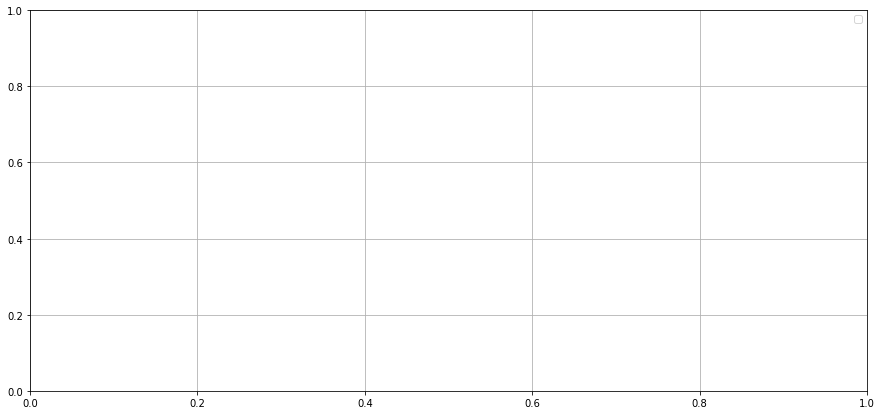

In [58]:
_slc = slice(None, 126)

plt.figure(figsize=(15, 7))
plt.plot(res_big[0]['test'].iloc[_slc] ** 2, label='$y_t^2$')
plt.plot(tested_seas.hist_output.iloc[_slc], label='$h_t$ fuzzy seasonal')
plt.plot(tested_wos.hist_output.iloc[_slc], label='$h_t$ fuzzy w/o seasonality')
plt.plot(rgf.iloc[_slc], label='$h_t$ classic')

plt.legend()
plt.grid()

_fmt = 'pdf'
_now = str(pd.Timestamp.now().floor('s')).replace(':', '-').replace(' ', '_')
_fig_name = f'res_analysis_fig_now.{_fmt}'
plt.savefig(FIGS_DIR / _fig_name, format=_fmt)